<a href="https://colab.research.google.com/github/thonyvel98/InteligenciaArtificial2024-2/blob/main/Clase_sem_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
movies = pd.read_csv("/content/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")
tags = pd.read_csv("/content/tags.csv")

In [2]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [3]:
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [4]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
del ratings['timestamp']
del tags['timestamp']


In [6]:
print(ratings.index)
print(tags.index)
print(movies.index)

RangeIndex(start=0, stop=100836, step=1)
RangeIndex(start=0, stop=3683, step=1)
RangeIndex(start=0, stop=9742, step=1)


In [7]:
print(ratings.columns)
print(tags.columns)
print(movies.columns)

Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


In [8]:
ratings.head(2)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


In [9]:
print(ratings['rating'].describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [10]:
print(ratings['rating'].mode())

0    4.0
Name: rating, dtype: float64


In [11]:
ratings.shape

(100836, 3)

In [12]:
tags.shape

(3683, 3)

In [13]:
movies.shape

(9742, 3)

In [14]:
movies.isnull().any()

,0
movieId,False
title,False
genres,False


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

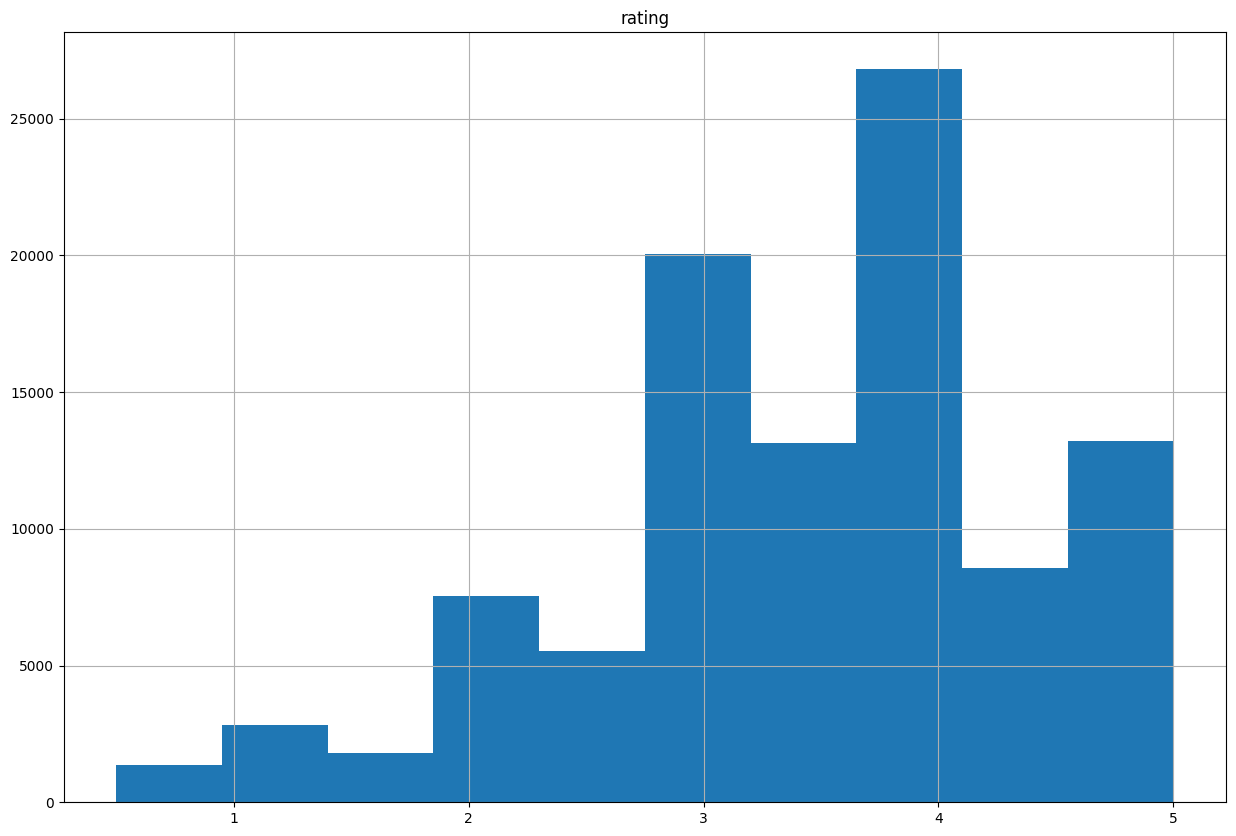

In [ ]:
%matplotlib inline
ratings.hist(column='rating', figsize=(15,10))

In [17]:
tags.head(10)

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
5,2,89774,Tom Hardy
6,2,106782,drugs
7,2,106782,Leonardo DiCaprio
8,2,106782,Martin Scorsese
9,7,48516,way too long


In [19]:
unique_tags = tags['tag'].unique()
print(unique_tags)

['funny' 'Highly quotable' 'will ferrell' ... 'gun fu' 'heroic bloodshed'
 'Heroic Bloodshed']


In [21]:
print(len(unique_tags))

1589


In [22]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [24]:
tags_count=tags['tag'].value_counts()

In [26]:
type(tags_count)

pandas.core.series.Series

<Axes: xlabel='tag'>

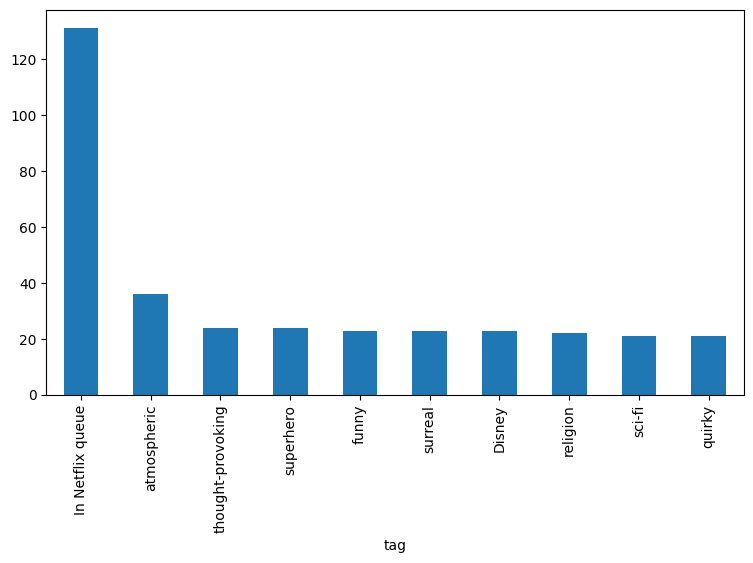

In [31]:
tags_count[:10].plot(kind='bar', figsize=(9,5))

In [34]:
filtered_movies = ratings[(ratings['rating'] >= 4) & (ratings['rating'] <= 5)]
#print(filtered_movies)
merged_df = pd.merge(filtered_movies, movies, on='movieId', how='left')
print(merged_df[['title', 'rating']])

                                     title  rating
0                         Toy Story (1995)     4.0
1                  Grumpier Old Men (1995)     4.0
2                              Heat (1995)     4.0
3              Seven (a.k.a. Se7en) (1995)     5.0
4               Usual Suspects, The (1995)     5.0
...                                    ...     ...
48575  Rogue One: A Star Wars Story (2016)     4.0
48576                         Split (2017)     4.0
48577        John Wick: Chapter Two (2017)     5.0
48578                       Get Out (2017)     5.0
48579                         Logan (2017)     5.0

[48580 rows x 2 columns]


In [35]:
print(len(merged_df))

48580


In [43]:
tmp=ratings['rating']>=4.0
print(type(tmp))
print(tmp)

<class 'pandas.core.series.Series'>
0          True
1          True
2          True
3          True
4          True
          ...  
100831     True
100832     True
100833     True
100834     True
100835    False
Name: rating, Length: 100836, dtype: bool


In [46]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [53]:
animation_movies = movies[movies['genres'].str.contains('Animation')]
print(len(animation_movies))

611
